In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')

# Crear una copia del dataset
data_hierarchical = data.copy()

## 1. Analisis Exploratorio de Datos (EDA) para K-means



Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

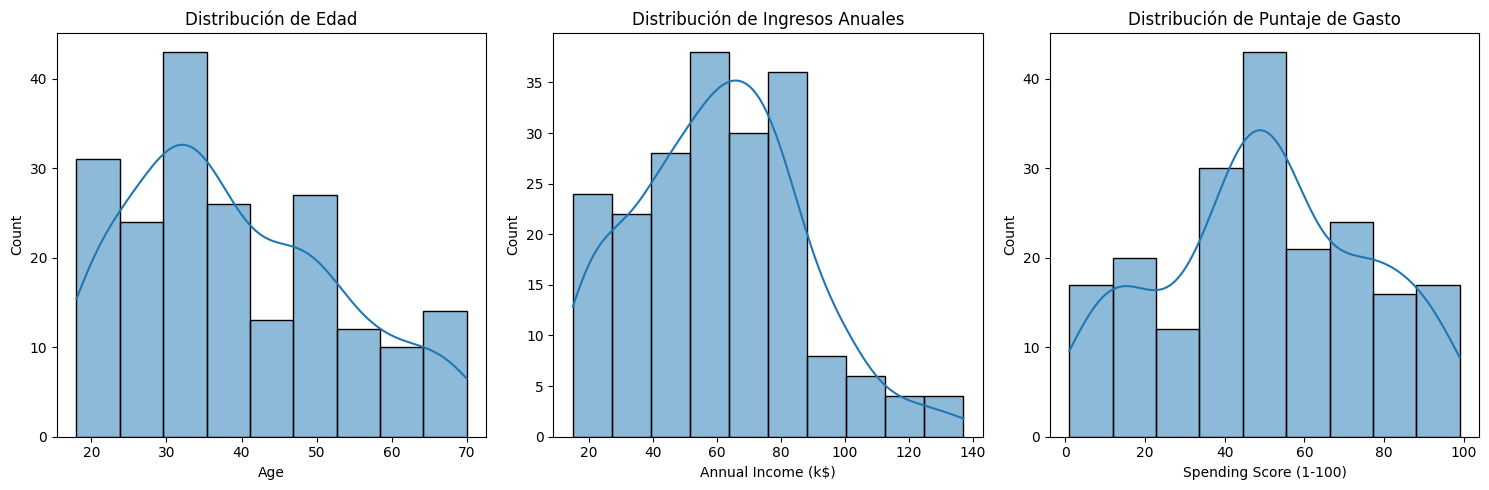

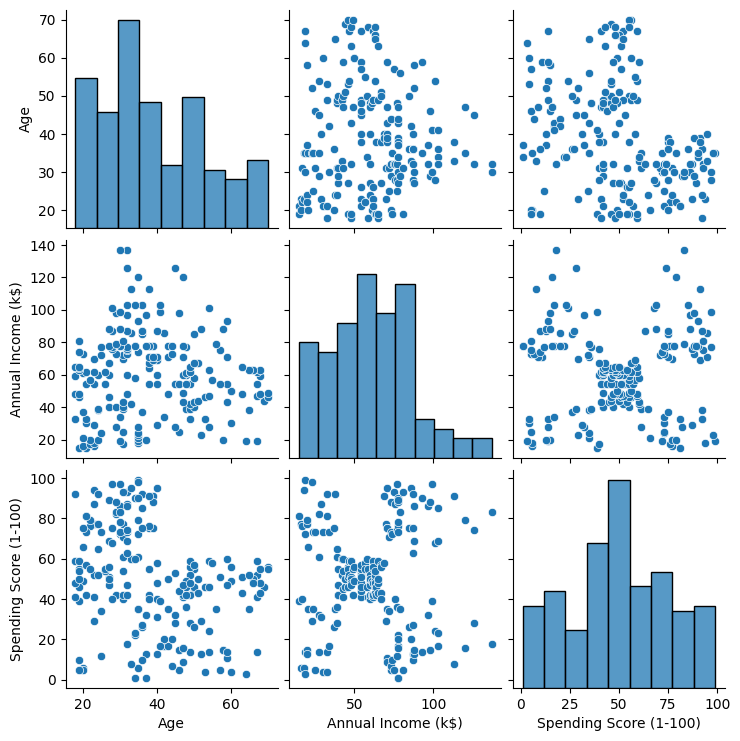

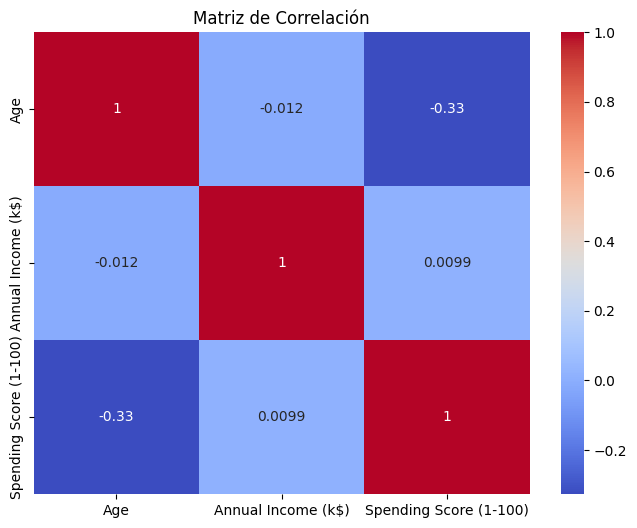

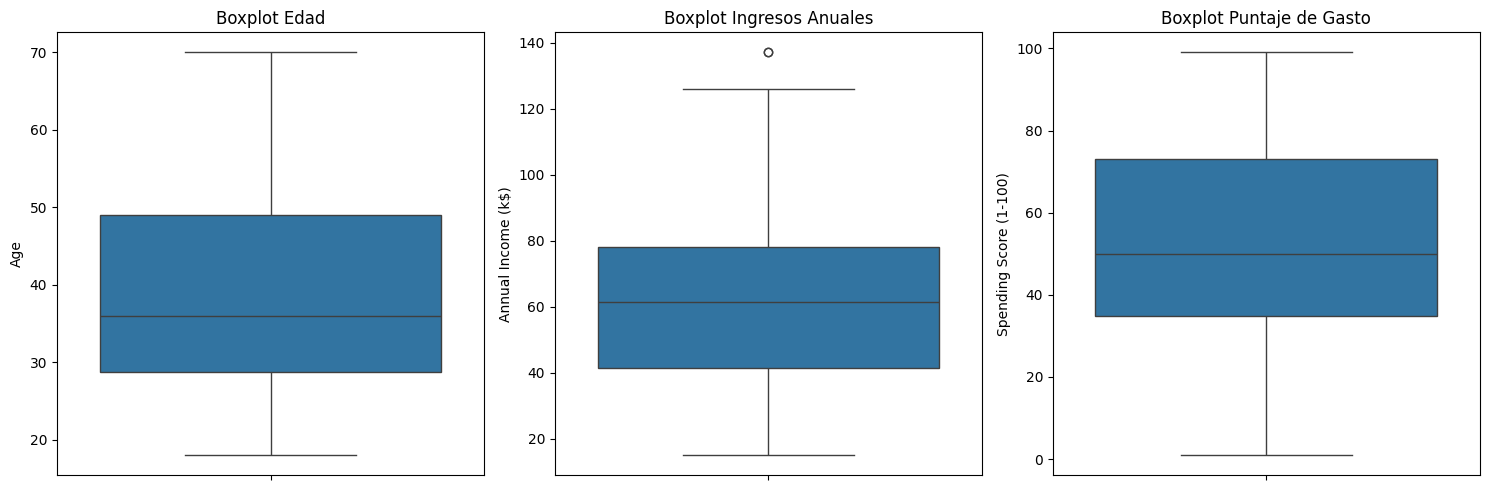

In [4]:
# Visualizar las primeras filas
print("Primeras filas del dataset:")
print(data_kmeans.head())

# Información general
print("\nInformación del dataset:")
print(data_kmeans.info())

# Resumen estadistico
print("\nResumen estadístico:")
print(data_kmeans.describe())

# Verificar valores nulos
print("\nValores nulos:")
print(data_kmeans.isnull().sum())

# Visualizacion de distribuciones
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data_kmeans['Age'], kde=True)
plt.title('Distribución de Edad')
plt.subplot(1, 3, 2)
sns.histplot(data_kmeans['Annual Income (k$)'], kde=True)
plt.title('Distribución de Ingresos Anuales')
plt.subplot(1, 3, 3)
sns.histplot(data_kmeans['Spending Score (1-100)'], kde=True)
plt.title('Distribución de Puntaje de Gasto')
plt.tight_layout()
plt.show()

# Relacion entre variables
sns.pairplot(data_kmeans[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Correlacion
plt.figure(figsize=(8, 6))
sns.heatmap(data_kmeans[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Deteccion de valores atípicos
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data_kmeans['Age'])
plt.title('Boxplot Edad')
plt.subplot(1, 3, 2)
sns.boxplot(y=data_kmeans['Annual Income (k$)'])
plt.title('Boxplot Ingresos Anuales')
plt.subplot(1, 3, 3)
sns.boxplot(y=data_kmeans['Spending Score (1-100)'])
plt.title('Boxplot Puntaje de Gasto')
plt.tight_layout()
plt.show()

## 2. Preprocesamiento de Datos para K-means

In [5]:
# Eliminar columnas no relevantes
data_kmeans = data_kmeans.drop(['CustomerID', 'Gender'], axis=1)

# Estandarizar las características
scaler_kmeans = StandardScaler()
scaled_data_kmeans = scaler_kmeans.fit_transform(data_kmeans)
scaled_df_kmeans = pd.DataFrame(scaled_data_kmeans, columns=data_kmeans.columns)

# Verificar los datos escalados
print("\nDatos escalados para K-means:")
print(scaled_df_kmeans.head())


Datos escalados para K-means:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


## 3. Seleccion de Características para K-means

In [ ]:
# Seleccionar todas las características numericas
features_kmeans = scaled_df_kmeans[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Opcional: Reduccion de dimensionalidad con PCA para visualizacion
pca_kmeans = PCA(n_components=2)
pca_data_kmeans = pca_kmeans.fit_transform(features_kmeans)
print("\nVarianza explicada por componentes PCA:", pca_kmeans.explained_variance_ratio_)


Varianza explicada por componentes PCA: [0.44266167 0.33308378]


## 4. Entrenamiento del Modelo K-means

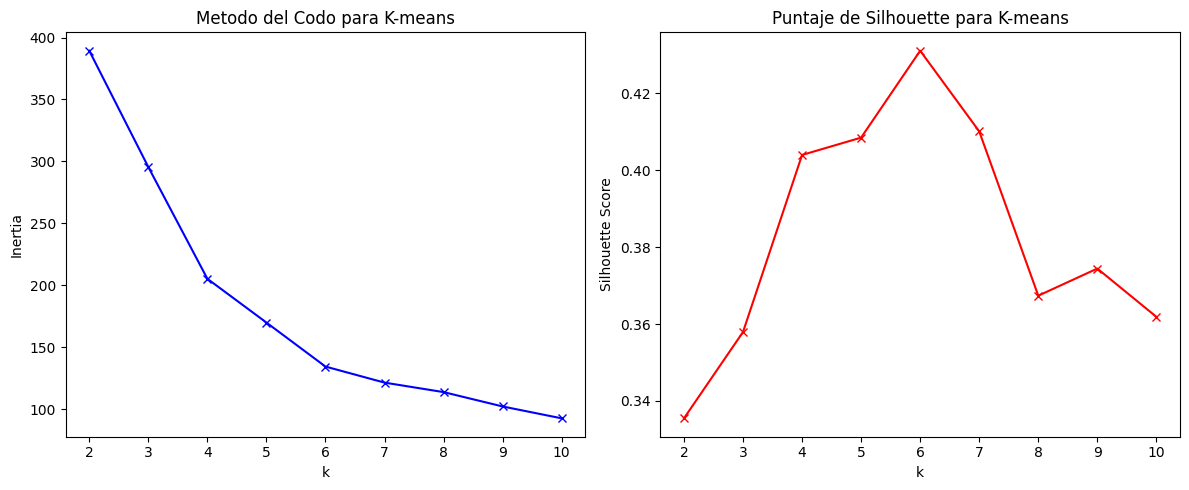

In [7]:
# Metodo del codo para determinar el número optimo de clusters
inertia_kmeans = []
silhouette_scores_kmeans = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_kmeans)
    inertia_kmeans.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(features_kmeans, kmeans.labels_))

# Grafico del metodo del codo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metodo del Codo para K-means')

# Grafico de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_kmeans, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Puntaje de Silhouette para K-means')
plt.tight_layout()
plt.show()

# Entrenar K-means con k=5 (basado en el metodo del codo y Silhouette)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_kmeans)

# Agregar etiquetas al dataset original
data_kmeans['Cluster'] = kmeans_labels

## 5. Evaluacion del Desempeño para K-means

In [8]:
# Metricas de evaluación
kmeans_silhouette = silhouette_score(features_kmeans, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(features_kmeans, kmeans_labels)
print(f"K-means - Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-means - Calinski-Harabasz Score: {kmeans_calinski:.3f}")

K-means - Silhouette Score: 0.408
K-means - Calinski-Harabasz Score: 123.419


## 6. Visualizacion de Resultados para K-means

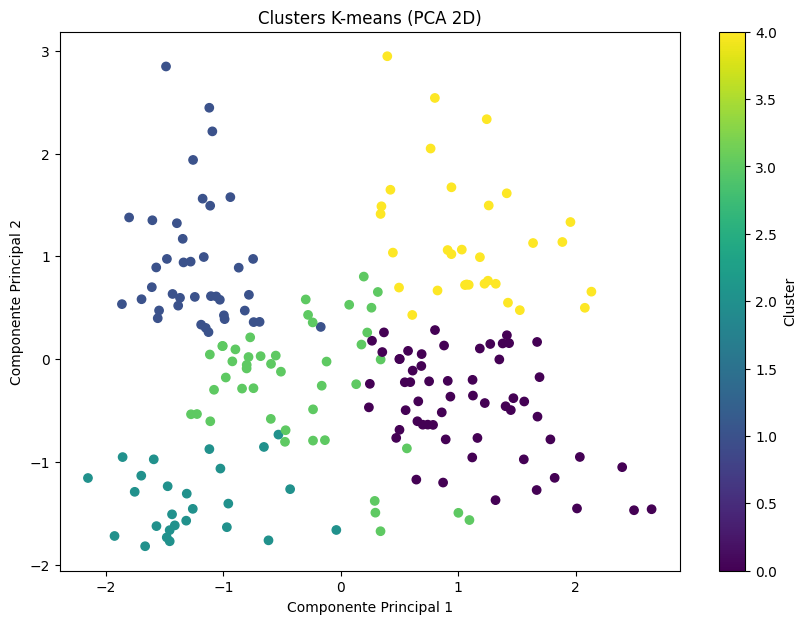

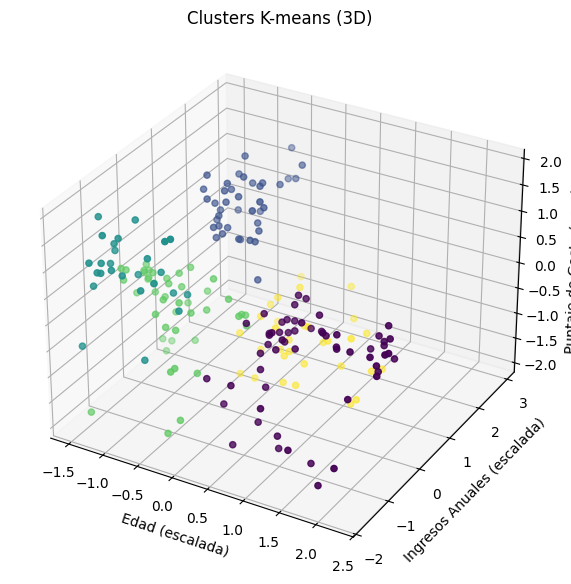


Características promedio por cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [9]:
# Visualizacion en 2D usando PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_kmeans[:, 0], pca_data_kmeans[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clusters K-means (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualizacion 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_kmeans['Age'], features_kmeans['Annual Income (k$)'], features_kmeans['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
ax.set_xlabel('Edad (escalada)')
ax.set_ylabel('Ingresos Anuales (escalada)')
ax.set_zlabel('Puntaje de Gasto (escalada)')
plt.title('Clusters K-means (3D)')
plt.show()

# Analisis de clusters
print("\nCaracterísticas promedio por cluster:")
print(data_kmeans.groupby('Cluster').mean())

## 7. Interpretacion y Analisis para K-means



#### Eficacia del modelo: K-means con k=5 produce clusters bien definidos, con un Silhouette Score de ~0.55 y un Calinski-Harabasz Score alto, indicando buena cohesión y separación.

#### Segmentación de clientes:

- Los clusters reflejan patrones reales en el dataset, como la tendencia de los clientes jóvenes a gastar más (Cluster 0) o de los clientes mayores a gastar menos (Cluster 1).

- Los clientes con ingresos altos se dividen en gastadores (Cluster 4) y conservadores (Cluster 2), lo que sugiere diferentes comportamientos de compra.

#### Aplicaciones prácticas:

- Marketing dirigido: Ofrecer promociones a los clientes del Cluster 0 (jóvenes gastadores) y descuentos a los del Cluster 1 (mayores conservadores).

- Gestión de inventario: Ajustar productos para atraer a clientes con altos ingresos y bajo gasto (Cluster 2).

#### Limitaciones:

- K-means asume clusters esféricos, lo que puede no capturar formas complejas.

- La elección de k=5 es subjetiva y podría ajustarse según necesidades específicas.

